# Introduction

The Waveform Operation and Layering Framework (WOLF) is a small project meant to provide a framework and graphical user interface (GUI) for reading, modifying, playing, and saving various waveforms.

In [1]:
import numpy as np
from pydub import AudioSegment
from wolf.utils.mechanics import *

# Define / read in audio file
audio_file = "..//samples//piano_oneshot.mp3"
track = load_track(audio_file)

### Determine track characteristics

Track characteristics include identifying track duration, individual channel definition, and identifing the sample quality.

In [2]:
# Calculate duration
duration, samprate, sampwidth, time_axis = characterize_track(track)

# Split to left and right channel
Lchan, Rchan = split_track(track)

### Visualization sanity check

Before WOLF gets too far, visualizations will be used as a guiding light for sanity checking application of filters and other sporadic functions.

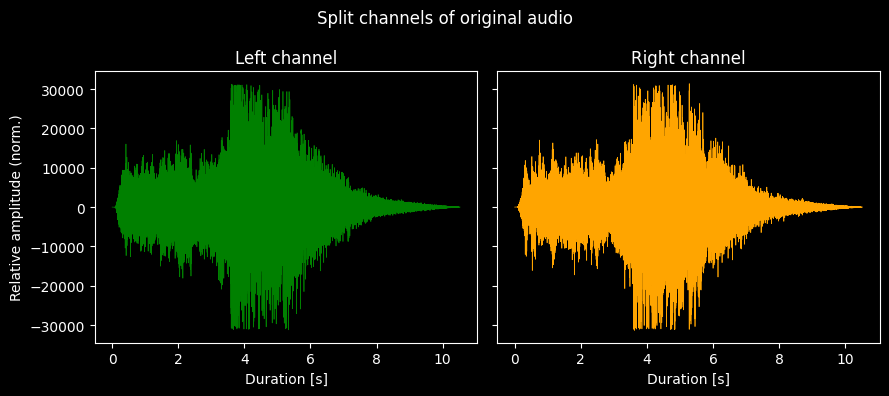

In [3]:
import matplotlib.pyplot as plt

# Always use a dark background for appearance
plt.style.use("dark_background")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4))
# Left mono signal
ax1.plot(time_axis, Lchan, color="green", linewidth=0.5)
ax1.set_xlabel("Duration [s]")
ax1.set_title("Left channel")
# Right mono signal
ax2.plot(time_axis, Rchan, color="orange", linewidth=0.5)
ax2.set_xlabel("Duration [s]")
ax2.set_title("Right channel")
ax1.set_ylabel("Relative amplitude (norm.)")
plt.suptitle("Split channels of original audio")
plt.tight_layout()
plt.show()

### Demonstrate basic split / recombination

Before any formatting can be applied to the audio track, we first need the capability of splitting and recombining the audio track. This is demonstrated below.

In [4]:
import pygame
from pydub.playback import play
import audiosegment

# Convert to numpy array for processing
left_chan, right_chan = split_track(track)

# Demonstrate track type
print(type(left_chan), type(right_chan))

# Re-combine
newtrack = arrays_to_track(left_chan, right_chan)

# Play the re-coded tack
play(newtrack)

pygame 2.5.2 (SDL 2.28.3, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Applying basic filters

To begin, basic high- and low-pass filters are applied. Samples can also be reversed, stretched, or randomized. This is meant as a precursor to more complex functions with real-time feedback mechanisms that modify then play back the final track.

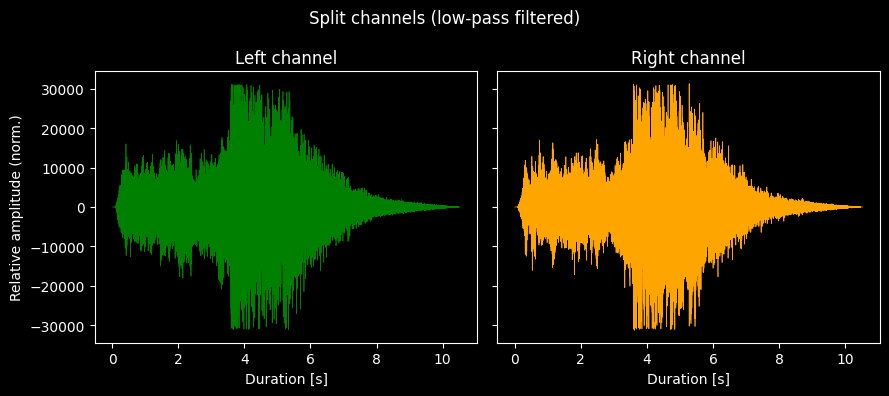

In [5]:
# Apply low-pass filter to full track
low_pass_track = low_pass(newtrack, samprate)
play(low_pass_track)

# Plot effect of low-pass filter
left_chan, right_chan = split_track(low_pass_track)
plt.style.use("dark_background")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4))
# Left mono signal
ax1.plot(time_axis, left_chan, color="green", linewidth=0.5)
ax1.set_xlabel("Duration [s]")
ax1.set_title("Left channel")
# Right mono signal
ax2.plot(time_axis, right_chan, color="orange", linewidth=0.5)
ax2.set_xlabel("Duration [s]")
ax2.set_title("Right channel")
ax1.set_ylabel("Relative amplitude (norm.)")
plt.suptitle("Split channels (low-pass filtered)")
plt.tight_layout()
plt.show()

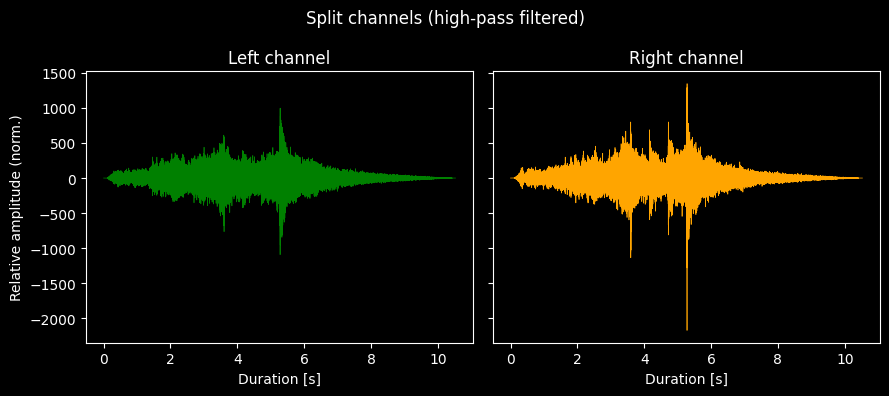

In [6]:

# Apply high-pass filter to full track
high_pass_track = high_pass(newtrack, samprate)
play(high_pass_track)

# Plot effect of low-pass filter
left_chan, right_chan = split_track(high_pass_track)
plt.style.use("dark_background")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4))
# Left mono signal
ax1.plot(time_axis, left_chan, color="green", linewidth=0.5)
ax1.set_xlabel("Duration [s]")
ax1.set_title("Left channel")
# Right mono signal
ax2.plot(time_axis, right_chan, color="orange", linewidth=0.5)
ax2.set_xlabel("Duration [s]")
ax2.set_title("Right channel")
ax1.set_ylabel("Relative amplitude (norm.)")
plt.suptitle("Split channels (high-pass filtered)")
plt.tight_layout()
plt.show()

#### Other ideas
- Playing two tracks at once, one in each channel
- Blending two tracks based on one track's detected beat